# Geodatenanalyse 1

## Übung 14: Lineare Regression - Lösung

In dieser Übung werden wir Beispiel zur linearen Regression in Python durchführen. 

### Multiple Lineare Regression mit scikit-learn

Für diese Übung werden wir einen der Demo-Datensätze aus scikit-learn benutzten. Die "Boston Housing Data" enthält Daten zu 506 Häusern in Boston in Form von 13 Parametern. Wir wollen versuchen den Wert eines Hauses ("MEDV") in Abhängigkeit mehrerer anderer Parameter vorhersagen (= abhängige Variable). 

Importiert dazu aus den scikit-learn Beispieldaten (`sklearn.datasets`) die Funktion `load_boston()`, und ladet mit deren Hilfe den Datensatz in Euren Code (`data = load_boston()`). Wandelt anschließend die eigentlichen Daten (boston_dataset.data) in einen pandas DataFrame um, mit den "feature_names" als Spalten (`columns = data.feature_names`). 

Erstellt für den DataFrame zusätzlich eine weitere Spalte mit dem Namen "MEDV" durch Anhängen des Attributes `boston_dataset.target` an den Datensatz.

In [1]:
# [1]
# packages laden
import pandas as pd
from sklearn.datasets import load_boston

# Datensatz einlesen und in pandas DataFrame umwandeln
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Spalte "MEDV" hinzufügen
boston['MEDV'] = boston_dataset.target

c:\Anaconda3\envs\GDA1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

Verschafft Euch nun einen Überblick über die Daten (explorativen Datenanalyse). Erstellt dafür eine Korrelationsmatrix mit allen Variablen, und visualisiert diese (s. Übung Bivariate Statistik). 

Wenn Ihr für Eure Heatmap `seaborn` benutzt, könnt Ihr mit dem Befehl `sns.set(rc={'figure.figsize':(15,10)})` die Abbildungsgröße anpassen, sodass alle Wert zu lesen sind. 

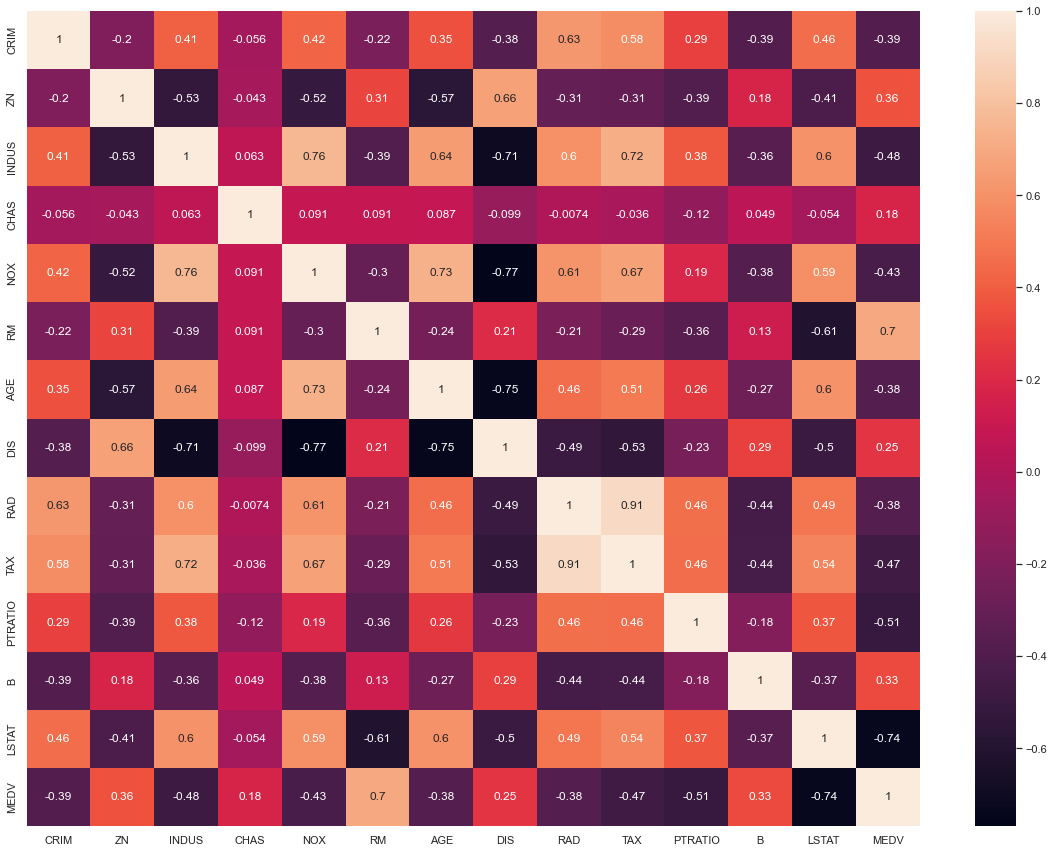

In [4]:
# [2]
# packages laden
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationsmatrix berechnen
correlation_matrix = boston.corr()

# Korrelationsmatrix darstellen
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(data=correlation_matrix, annot=True)

plt.show()

Wählt nun für die multiple lineare Regression der abhängigen Variablen MEDV zwei geeignete unabhängige Variablen aus: 

- diese sollten möglichst stark (> 0.7) mit der abhängigen Variablen "MEDV" korrelieren  

- aber weniger stark miteinander korrelieren (< 0.7)

Speichert nun die Werte der zwei unabhängigen Variablen in einen separaten DataFrame (z.B. "X") ab, ebenso die abhängige Variable (z.B. "Y").

In [5]:
# [3]
import numpy as np

# Werte der gewählten Variablen in DataFrame abspeichern
#X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns = ['LSTAT','RM', 'PTRATIO'])

Y = boston['MEDV']

Nun werden wir diesen Datensatz zur späteren Validierung in einen Trainings- und Test-Teil aufteilen. Die Funktion `sklearn.model_selection.train_test_split()` benötigt als Inputs die unabhängigen, sowie abhängigen Variablen und eine Angabe für die Größe des Test-Teils (`test_size=0.2`).

So werden zufallsbasiert 20% der Daten in dem Test-Datensatz abgespeichert, die übrigen 80% in dem Trainingsdatensatz. Entsprechend müssen für die Funktion vier Outputs definiert werden (z.B. als X_train, X_test, Y_train, Y_test).

In [6]:
# [4]
# packages laden 
from sklearn.model_selection import train_test_split

# Datensatz aufteilen
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Führt nun mit dem Trainingsdatensatz und der Funktion `sklearn.linear_model.LinearRegression()` eine lineare Regression durch. 

Wie die letzten Übungen auch, muss dafür zuerst ein Linear-Regression-Objekt erzeugt werden (mit den default Einstellungen). Passt dann über das Attribut `.fit` das Regressions-Objekt an die beiden Traniningsdatensätze (X und Y) an. 

In [7]:
# [5]
# packages laden 
from sklearn.linear_model import LinearRegression

# Regressionsobjekt erstellen
lin_model = LinearRegression()

# Regressionsobjekt anpassen 
lin_model.fit(X_train, Y_train)

LinearRegression()

Nun wollen wir das angepasste multiple lineare Modell mit Hilfe geeigneter Fehlermaße und den Testdaten validieren. Importiert dafür aus `sklearn.metrics` den `mean_squared_error` und das Bestimmtheitsmaß `r2_score`. 

Wertet das Linear-Regression-Objekt über das Attribut `.predict()` für die Werte der beiden abhängigen Variablen aus um Vorhersagewerte für die unabhängige Variable für beide Fälle zu erhalten. Tut dies sowohl mit den Trainingsdaten, als auch mit den Testdaten. 

Um die Anpassung des Regressionsmodells an sich zu bewerten, bestimmt den RMSE zwischen den beobachteten und vorhergesagten Werten der abhängigen Variable an den Werten der unabhängigen Variable im Trainingsdatensatz. 

Um das Regressionsmodells außerhalb dieser Punkte zu validieren, verfahrt ebenso mit dem Testdatensatz, und vergleicht die beiden RMSE-Werte. 

In [8]:
# [6]
# packages laden
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Modelvorhersagen für Trainingsdaten
y_train_predict = lin_model.predict(X_train)

# Fehlermaße (RMSE, r2) für Vorhersage mit Trainingsdaten berechnen und ausgeben lassen
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Modell Evaluation Trainingsdaten:")
print (rmse, r2)

# Modelvorhersagen für Testsdaten
y_test_predict = lin_model.predict(X_test)

# Fehlermaße (RMSE, r2) für Vorhersage mit Testdaten berechnen und ausgeben lassen
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("\n Modell Evaluation Testdaten:")
print (rmse, r2)

Modell Evaluation Trainingsdaten:
5.30386319330793 0.6725214335656512

 Modell Evaluation Testdaten:
4.913937534764081 0.6915878280744173


Beurteilt nun zum Einen die Anpassung des linearen Modells an sich, als auch die Evaluation mit den Testdaten. Seid Ihr mit dem Ergebnis der Regression zufrieden?

Wenn Ihr noch Zeit habt, könnt Ihr die Daten und Ergebisse und der multiplen linearen Regression noch visualisierenm, z. B. um die Daten optisch auf Ausreisser, Linearität usw. überprüfen. 

## Ende

### Referenzen: 

https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0


https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
